Team Members: Erika Dickson, Drashti Mehta, Dulce Funez Chinchilla

4 or more performance metrics: Loss function, MSE, precision, recall
3 or more visualizing techniques for presenting the results: scatter plot, elbow plot, stacked bar plot with performance evaluation vals
Compare and analyze all the ML models that you have built for the project and present the performance analysis

In [60]:
import pandas as pd
import numpy as np
import pickle
import math
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from data_preprocessing import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import xgboost as xg 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor


In [61]:
dreams_proc = pd.read_csv('training_data.csv')
print(dreams_proc.shape)
dreams_proc.head(10)

(16800, 12)


,Unnamed: 0,Gender,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,15345,1.0,0.500000,0.000000,0.166667,0.250000,0.0,0.833333,0.041667,0.007576,0.010417,0.0
1,8476,0.0,0.750000,0.055556,0.117647,0.176471,0.0,0.500000,0.022222,0.015152,0.013889,1.0
2,9052,1.0,0.000000,0.000000,0.250000,0.000000,0.0,0.500000,0.050000,0.045455,0.000000,1.0
3,17206,0.0,0.333333,0.000000,0.176471,0.235294,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,16188,1.0,0.250000,0.000000,0.142857,0.000000,0.0,1.000000,0.085714,0.012987,0.017857,1.0
5,4475,1.0,1.000000,0.000000,0.250000,0.000000,0.0,1.000000,0.150000,0.000000,0.000000,0.0
6,11744,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.100000,0.000000,0.250000,1.0
7,6056,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0
8,3755,1.0,0.000000,0.000000,0.000000,0.200000,0.0,0.142857,0.040000,0.127273,0.125000,0.0
9,15650,1.0,0.600000,0.166667,0.200000,0.300000,0.0,0.625000,0.066667,0.022727,0.000000,1.0


In [62]:
# KNN Regression using scikit-learn
# Applying KNN regression to the processed dataset with k=10
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_train_copy, y_train_copy)
y_predict_knn = knn_regressor.predict(X_test_copy)

# Saving the trained KNN model
filename = 'finalized_model_M1.model'
pickle.dump(knn_regressor, open(filename, 'wb'))

# Loading the KNN model and evaluating its performance
loaded_model = pickle.load(open(filename, 'rb'))
result_knn = loaded_model.score(X_test_copy, y_test_copy)
print("KNN Regressor R^2 Score (Model Performance):", result_knn)

# Evaluating KNN performance using different metrics

# Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test_copy, y_predict_knn)
print("KNN - Mean Squared Error (MSE):", mse_knn)

# Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test_copy, y_predict_knn)
print(f'KNN - Mean Absolute Error (MAE): {mae_knn}')

# Root Mean Squared Error (RMSE)
rmse_knn = (mse_knn ** 0.5)
print(f'KNN - Root Mean Squared Error (RMSE): {rmse_knn}')

# R-squared (R2 Score)
r2_knn = r2_score(y_test_copy, y_predict_knn)
print(f"KNN - R-squared (R2) Score:", r2_knn)


KNN Regressor R^2 Score (Model Performance): -0.014712245376683253
KNN - Mean Squared Error (MSE): 0.22821809168758733
KNN - Mean Absolute Error (MAE): 0.42499549743080955
KNN - Root Mean Squared Error (RMSE): 0.4777217722561819
KNN - R-squared (R2) Score: -0.014712245376683253


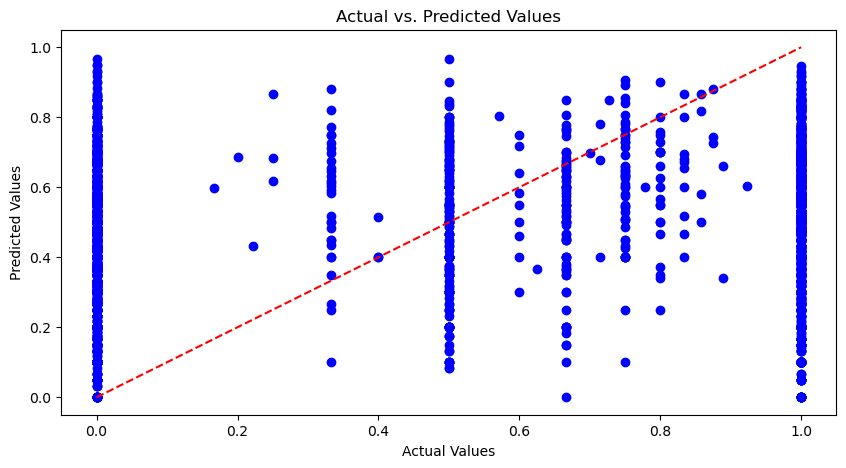

In [63]:
# Plotting Actual vs. Predicted Values for KNN

plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_knn, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

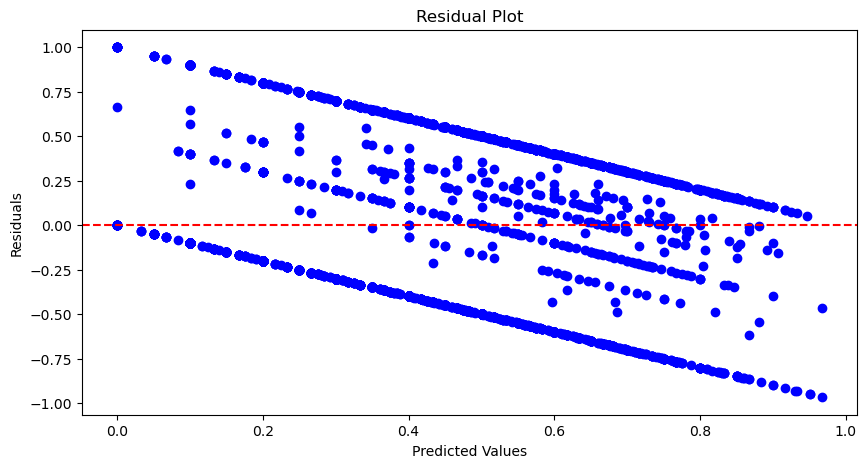

In [ ]:
# Plotting the Residuals for KNN

residuals_knn = np.array(y_test_copy) - np.array(y_predict_knn)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_knn, residuals_knn, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

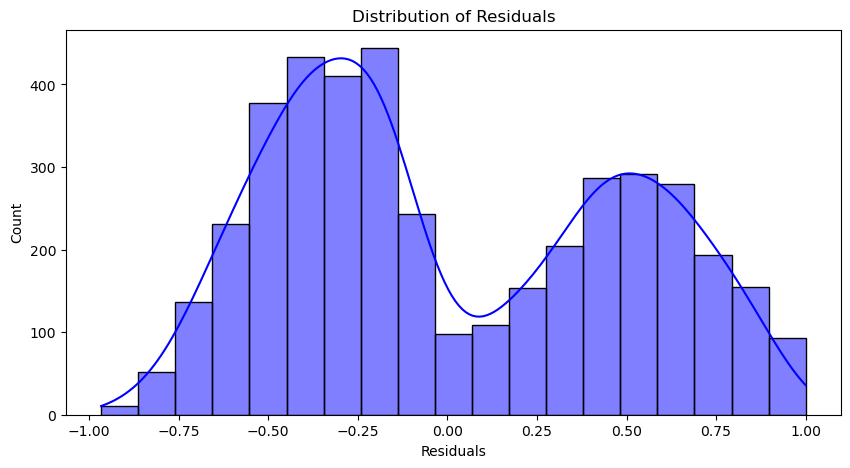

In [ ]:
# Plotting the Distribution of Residuals for KNN

plt.figure(figsize=(10, 5))
sns.histplot(residuals_knn, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [66]:
# Linear Regression using scikit-learn
# Applying linear regression to the processed dataset
linear_regression = LinearRegression() 
linear_regression.fit(X_train_copy, y_train_copy) 
y_predict_lr = linear_regression.predict(X_test_copy)

# Saving the trained Linear Regression model
filename_lr = 'finalized_model_LR1.model'
pickle.dump(linear_regression, open(filename_lr, 'wb'))

# Loading the Linear Regression model and evaluating its performance
loaded_model = pickle.load(open(filename_lr, 'rb'))
result_lr = loaded_model.score(X_test_copy, y_test_copy)
print("Linear Regression Model R^2 Score (Performance):", result_lr)

# Evaluating Linear Regression performance using different metrics

# Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test_copy, y_predict_lr)
print("Linear Regression - Mean Squared Error (MSE):", mse_lr)

# Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test_copy, y_predict_lr)
print(f'Linear Regression - Mean Absolute Error (MAE): {mae_lr}')

# Root Mean Squared Error (RMSE)
rmse_lr = (mse_lr ** 0.5)
print(f'Linear Regression - Root Mean Squared Error (RMSE): {rmse_lr}')

# R-squared (R2 Score)
r2_lr = r2_score(y_test_copy, y_predict_lr)
print(f"Linear Regression - R-squared (R2) Score:", r2_lr)

Linear Regression Model R^2 Score (Performance): 0.03417919614138065
Linear Regression - Mean Squared Error (MSE): 0.21722195802117458
Linear Regression - Mean Absolute Error (MAE): 0.4385584571635809
Linear Regression - Root Mean Squared Error (RMSE): 0.4660707650359273
Linear Regression - R-squared (R2) Score: 0.03417919614138065


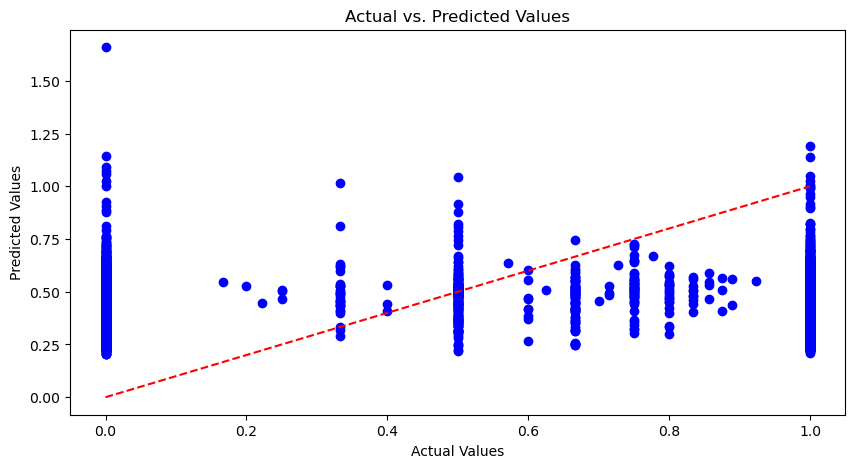

In [67]:
# Plotting Actual vs. Predicted Values for Linear Regression

plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_lr, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

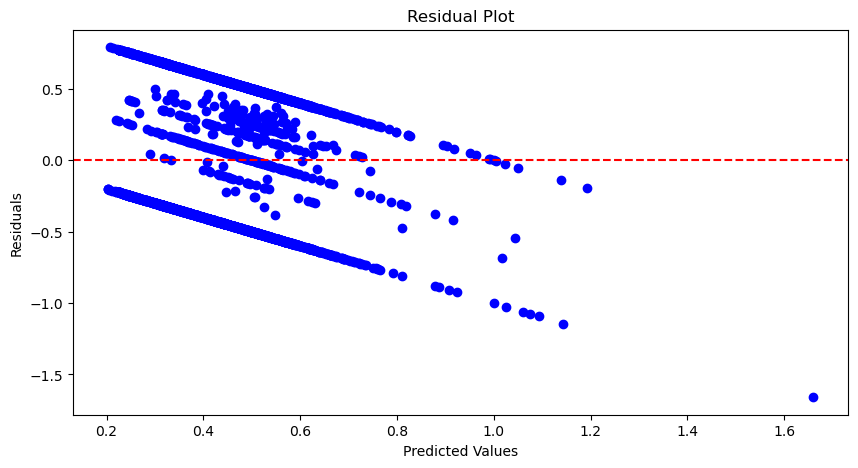

In [68]:
# Plotting the Residuals for Linear Regression

residuals_lr = np.array(y_test_copy) - np.array(y_predict_lr)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_lr, residuals_lr, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

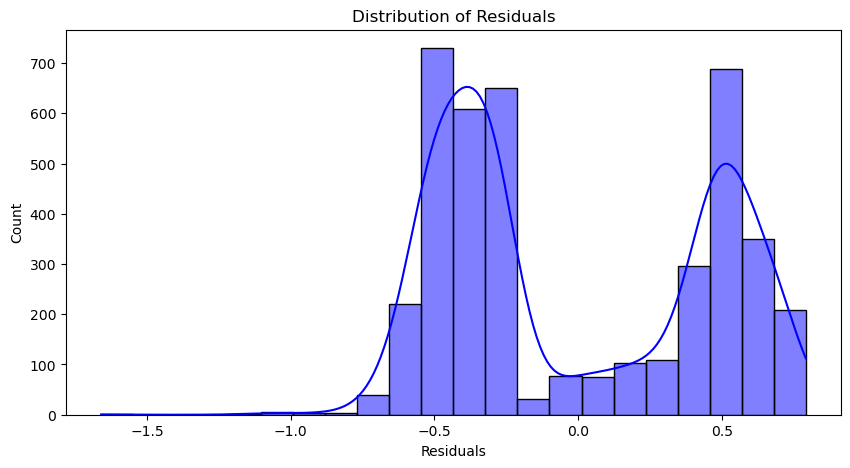

In [69]:
# Plotting the Distribution of Residuals for Linear Regression

plt.figure(figsize=(10, 5))
sns.histplot(residuals_lr, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [70]:
 # Support Vector Machine (SVM) Regression using scikit-learn
# Applying SVM regression to the processed dataset
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_regressor.fit(X_train_copy, y_train_copy)
y_predict_svm = svm_regressor.predict(X_test_copy)

# Saving the trained SVM model
filename_svm = 'finalized_model_SVM1.model'
pickle.dump(svm_regressor, open(filename_svm, 'wb'))

# Loading the SVM model and evaluating its performance
loaded_svm_model = pickle.load(open(filename_svm, 'rb'))
result_svm = loaded_svm_model.score(X_test_copy, y_test_copy)
print("SVM Model R^2 Score (Performance):", result_svm)

# Evaluating SVM performance using different metrics

# Mean Squared Error (MSE)
mse_svm = mean_squared_error(y_test_copy, y_predict_svm)
print("SVM - Mean Squared Error (MSE):", mse_svm)

# Mean Absolute Error (MAE)
mae_svm = mean_absolute_error(y_test_copy, y_predict_svm)
print(f'SVM - Mean Absolute Error (MAE): {mae_svm}')

# Root Mean Squared Error (RMSE)
rmse_svm = (mse_svm ** 0.5)
print(f'SVM - Root Mean Squared Error (RMSE): {rmse_svm}')

# R-squared (R2 Score)
r2_svm = r2_score(y_test_copy, y_predict_svm)
print(f"SVM - R-squared (R2) Score:", r2_svm)

SVM Model R^2 Score (Performance): -0.10797930738563677
SVM - Mean Squared Error (MSE): 0.2491947094489012
SVM - Mean Absolute Error (MAE): 0.39668461030488655
SVM - Root Mean Squared Error (RMSE): 0.4991940599094717
SVM - R-squared (R2) Score: -0.10797930738563677


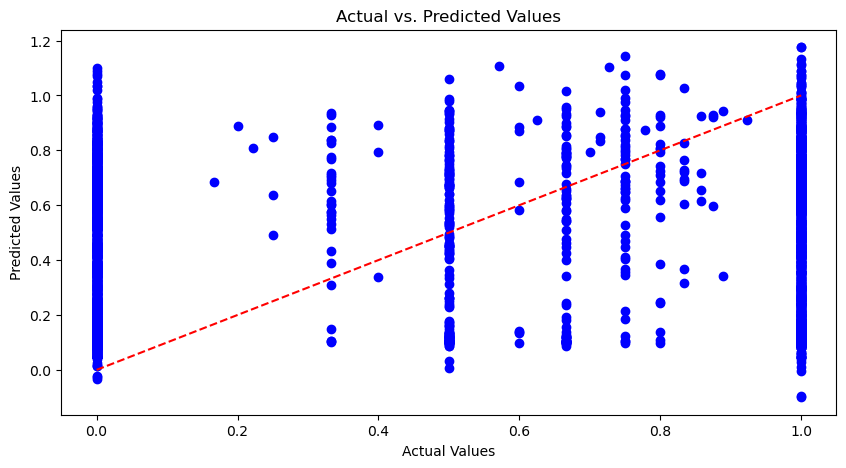

In [71]:
# Plotting Actual vs. Predicted Values for SVM

plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_svm, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

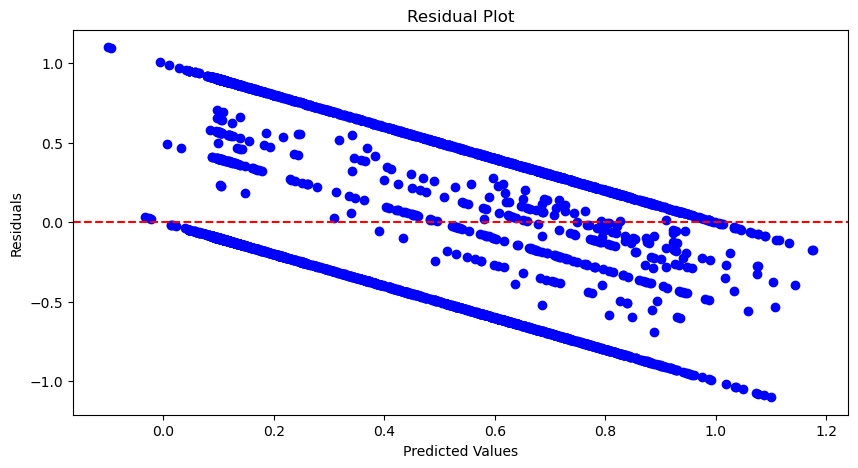

In [72]:
# Plotting the Residuals for SVM

residuals_svm = np.array(y_test_copy) - np.array(y_predict_svm)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_svm, residuals_svm, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

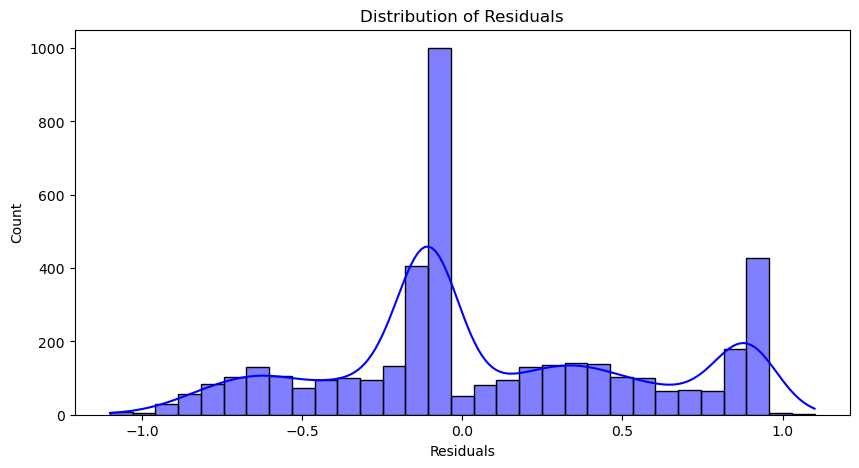

In [73]:
# Plotting the Distribution of Residuals for SVM

plt.figure(figsize=(10, 5))
sns.histplot(residuals_svm, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [74]:
# Random Forest Regression using scikit-learn
# Applying Random Forest regression to the processed dataset
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_copy, y_train_copy)
y_predict_rf = rf_regressor.predict(X_test_copy)

# Saving the trained Random Forest model
filename_rf = 'finalized_model_RF1.model'
pickle.dump(rf_regressor, open(filename_rf, 'wb'))

# Loading the Random Forest model and evaluating its performance
loaded_rf_model = pickle.load(open(filename_rf, 'rb'))
result_rf = loaded_rf_model.score(X_test_copy, y_test_copy)
print("Random Forest Model R^2 Score (Performance):", result_rf)

# Evaluating Random Forest performance using different metrics

# Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test_copy, y_predict_rf)
print("Random Forest - Mean Squared Error (MSE):", mse_rf)

# Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test_copy, y_predict_rf)
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')

# Root Mean Squared Error (RMSE)
rmse_rf = (mse_rf ** 0.5)
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')

# R-squared (R2 Score)
r2_rf = r2_score(y_test_copy, y_predict_rf)
print(f"Random Forest - R-squared (R2) Score:", r2_rf)

Random Forest Model R^2 Score (Performance): -0.007773943806621997
Random Forest - Mean Squared Error (MSE): 0.2266576040211706
Random Forest - Mean Absolute Error (MAE): 0.4216853763728136
Random Forest - Root Mean Squared Error (RMSE): 0.47608571079288925
Random Forest - R-squared (R2) Score: -0.007773943806621997


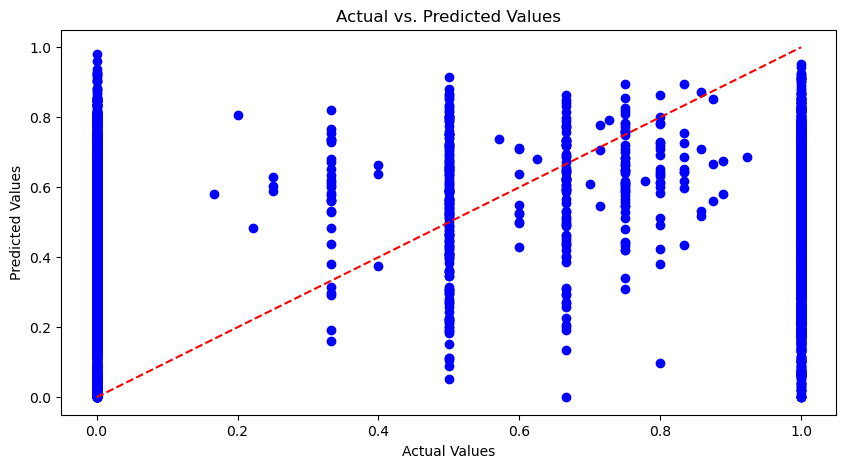

In [75]:
# Plotting Actual vs. Predicted Values for Random Forest

plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_rf, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

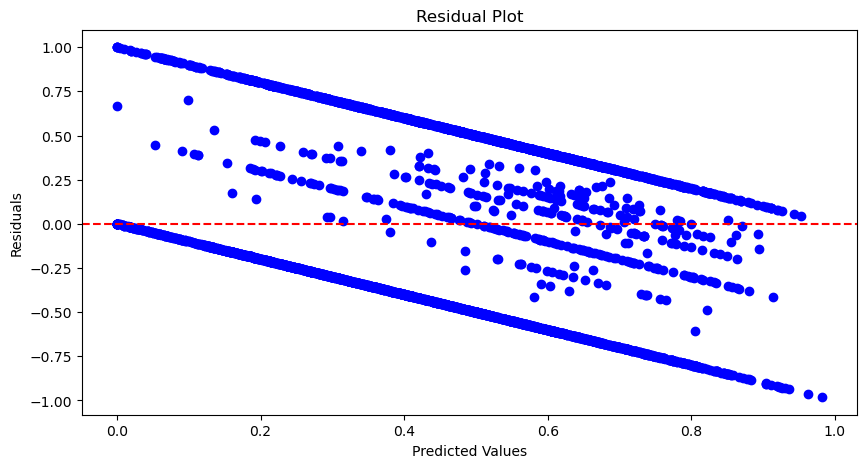

In [76]:
# Plotting the Residuals for Random Forest

residuals_rf = np.array(y_test_copy) - np.array(y_predict_rf)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_rf, residuals_rf, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

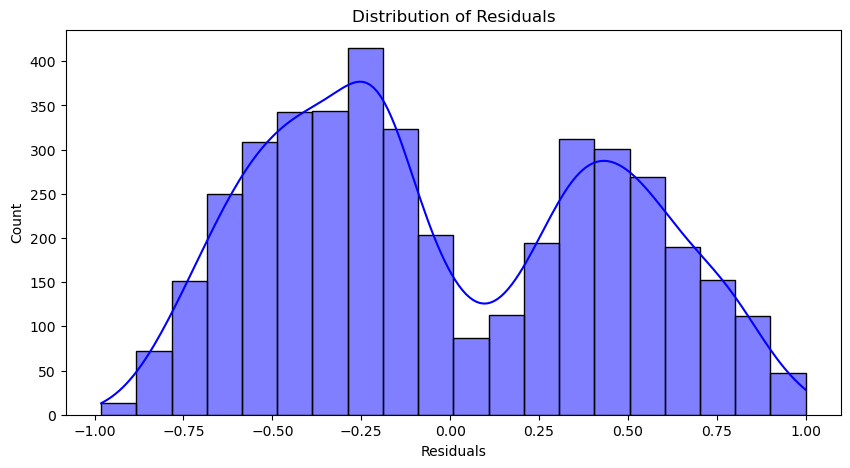

In [77]:
# Plotting the Distribution of Residuals for Random Forest

plt.figure(figsize=(10, 5))
sns.histplot(residuals_rf, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [78]:
# Lasso Regression using scikit-learn
# Applying Lasso regression to the processed dataset
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train_copy, y_train_copy)
y_predict_lasso = lasso_regressor.predict(X_test_copy)

# Saving the trained Lasso model
filename_lasso = 'finalized_model_Lasso1.model'
pickle.dump(lasso_regressor, open(filename_lasso, 'wb'))

# Loading the Lasso model and evaluating its performance
loaded_lasso_model = pickle.load(open(filename_lasso, 'rb'))
result_lasso = loaded_lasso_model.score(X_test_copy, y_test_copy)
print("Lasso Regression Model R^2 Score (Performance):", result_lasso)

# Evaluating Lasso performance using different metrics

# Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test_copy, y_predict_lasso)
print("Lasso - Mean Squared Error (MSE):", mse_lasso)

# Mean Absolute Error (MAE)
mae_lasso = mean_absolute_error(y_test_copy, y_predict_lasso)
print(f'Lasso - Mean Absolute Error (MAE): {mae_lasso}')

# Root Mean Squared Error (RMSE)
rmse_lasso = (mse_lasso ** 0.5)
print(f'Lasso - Root Mean Squared Error (RMSE): {rmse_lasso}')

# R-squared (R2 Score)
r2_lasso = r2_score(y_test_copy, y_predict_lasso)
print(f"Lasso - R-squared (R2) Score:", r2_lasso)


Lasso Regression Model R^2 Score (Performance): -0.00017214827764089335
Lasso - Mean Squared Error (MSE): 0.2249478904773281
Lasso - Mean Absolute Error (MAE): 0.4592256816040523
Lasso - Root Mean Squared Error (RMSE): 0.4742867175847623
Lasso - R-squared (R2) Score: -0.00017214827764089335


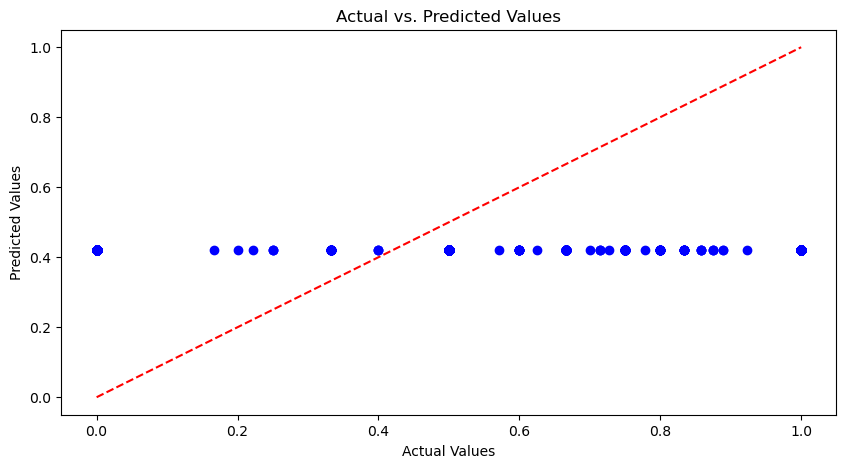

In [80]:
# Plotting Actual vs. Predicted Values for Lasso

plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_lasso, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

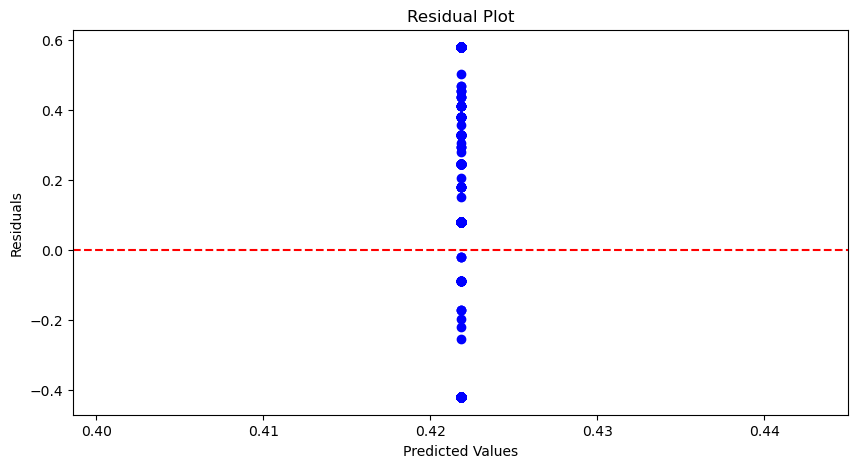

In [82]:
# Plotting the Residuals for Lasso

residuals_lasso = np.array(y_test_copy) - np.array(y_predict_lasso)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_lasso, residuals_lasso, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

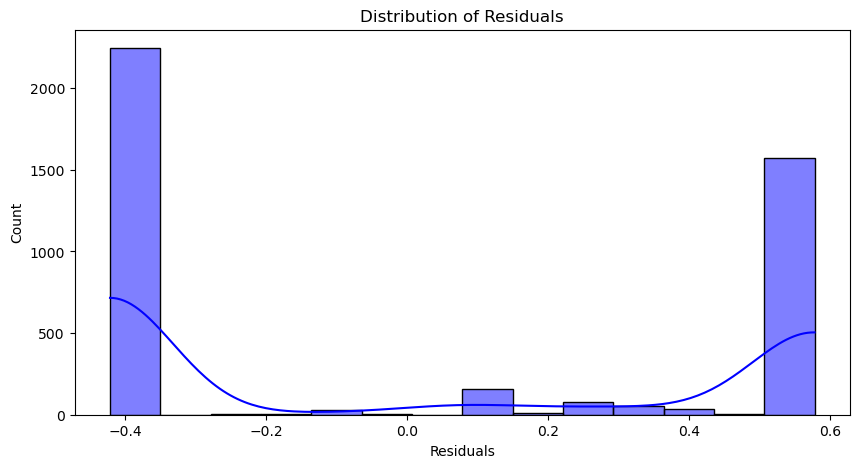

In [84]:
# Plotting the Distribution of Residuals for Lasso

plt.figure(figsize=(10, 5))
sns.histplot(residuals_lasso, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [87]:
#Extreme Gradient Boosting
#XGB on the processed dataset
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123) 
xgb_r.fit(X_train_copy, y_train_copy) 
y_predict_xgb = xgb_r.predict(X_test_copy) 

# Saving the trained XBG model
mse_xgb = mean_squared_error(y_test_copy, y_predict_xgb)
print("XGBoost MSE:", mse_xgb)

filename_xgb = 'finalized_model_XGB1.model'
pickle.dump(xgb_r, open(filename_xgb, 'wb'))

# Loading the XGBoost model and evaluating its performance
loaded_xgb_model = pickle.load(open(filename_xgb, 'rb'))
result_xgbr = xgb_r.score(X_test_copy, y_test_copy)
print("XGBoost Score:", result_xgbr)

# Evaluating XGBoost performance using different metrics

# Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test_copy, y_predict_xgb)
print("XGB - Mean Squared Error (MSE):", mse_xgb)

# Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test_copy, y_predict_xgb)
print(f'XGB - Mean Absolute Error (MAE): {mae_xgb}')

# Root Mean Squared Error (RMSE)
rmse_xgb = (mse_xgb ** 0.5)
print(f'XGB - Root Mean Squared Error (RMSE): {rmse_xgb}')

# R-squared (R2 Score)
r2_xgb = r2_score(y_test_copy, y_predict_xgb)
print(f"XGB - R-squared (R2) Score:", r2_xgb)

XGBoost MSE: 0.20653080322500836
XGBoost Score: 0.08171462862470102
XGB - Mean Squared Error (MSE): 0.20653080322500836
XGB - Mean Absolute Error (MAE): 0.41652344750007
XGB - Root Mean Squared Error (RMSE): 0.45445660213601075
XGB - R-squared (R2) Score: 0.08171462862470102


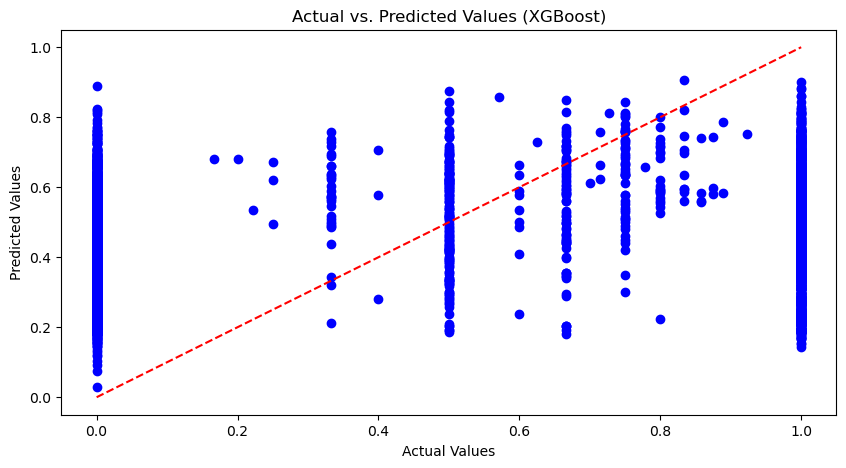

In [88]:
#Actual vs Predicted Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_xgb, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.show()

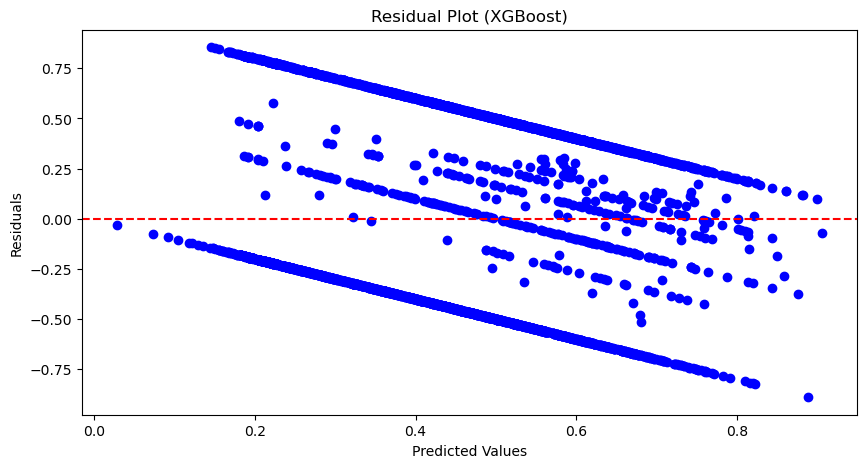

In [89]:
#Residuals Plot
residuals_xgb = np.array(y_test_copy) - np.array(y_predict_xgb)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_xgb, residuals_xgb, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()

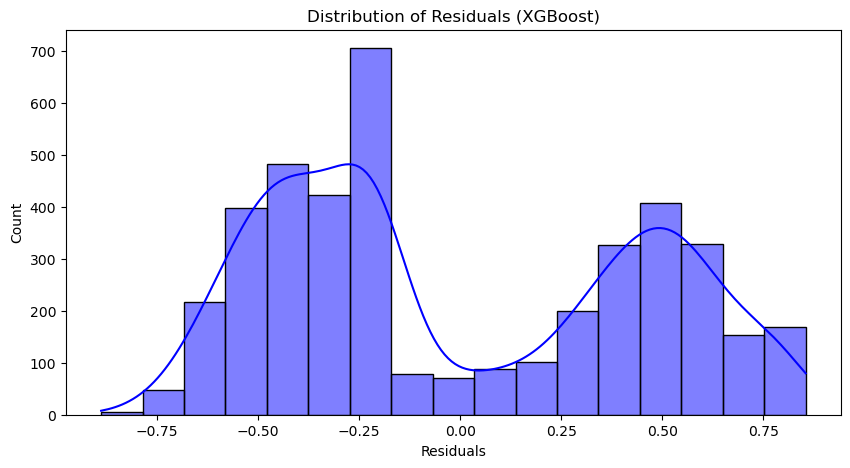

In [90]:
#Distribution of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals_xgb, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (XGBoost)')
plt.show()

In [ ]:
# Training the Histogram-based Gradient Boosting Regressor (HGBR) model
hgbr = HistGradientBoostingRegressor(loss = 'squared_error', learning_rate=0.1, max_iter=100,
                                    max_bins=255, early_stopping='auto', n_iter_no_change=100).fit(X_train_copy, y_train_copy)
y_predict_hgbr = hgbr.predict(X_test_copy)
filename_hgbr = 'finalized_model_HGBR1.model'
pickle.dump(hgbr, open(filename_hgbr, 'wb'))

loaded_hgbr_model = pickle.load(open(filename_hgbr, 'rb'))

# Evaluating the model's performance on the test data and printing the R^2 score

result_hgbr = loaded_hgbr_model.score(X_test_copy, y_test_copy)
print("Histogram-based Gradient Boosting Regression Tree Score:", result_hgbr)

# Evaluating and printing the model's performance on the training data (R^2 score)

score = hgbr.score(X_train_copy, y_train_copy)
print(score)

Histogram-based Gradient Boosting Regression Tree Score: 0.06411459290603594
0.2112012641890466


Five primary models were utilized to analyze the data and make predictions of our target feature, NegativeEmotions, utilizing our training set. These models included: KNN Regressor, Linear Regression, SVMs, Random Forest, and XGB. From our analysis (referenceable in the upper portion of the Jupyter Notebook), we determined that the model using the XGB algorithm has the best performance at approximately 8%. The evaluation metrics we used for our data included MSE, MAE, RMSE, and an R^2 score. The largest MSE figure was determined to be 0.25 for SVM, and the smallest MSE figure was approximately 0.21 with XGB. The largest MAE figure determined was 0.42 with KNN Regression, and the least MAE figure was SVM with 0.29. The model with the greatest RMSE figure was the SVM model with an RMSE score of approximately 0.50, and the model with the smallest RMSE score was Linear Regression with 0.47. Lastly, the greatest R^2 score originated from the Linear Regression model with a score 0.03, and the smallest R^2 score is from the SVM model -0.11.